In [1]:
import sys
sys.path.insert(0, r'C:\Users\User\BIBAS')  # path to your repo

In [2]:
import random
from pgmpy.factors.discrete import TabularCPD
import numpy as np

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [ ]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD

model = DiscreteBayesianNetwork([('A', 'C'), ('B', 'C'), ('C', 'D')])

cpd_A = TabularCPD('A', 2, [[0.7], [0.3]])
cpd_B = TabularCPD('B', 2, [[0.6], [0.4]])
cpd_C = TabularCPD('C', 2, [[0.9, 0.6, 0.3, 0.1],
                            [0.1, 0.4, 0.7, 0.9]],
                   evidence=['A', 'B'], evidence_card=[2, 2])
cpd_D = TabularCPD('D', 2, [[0.8, 0.2], [0.2, 0.8]],
                   evidence=['C'], evidence_card=[2])

model.add_cpds(cpd_A, cpd_B, cpd_C, cpd_D)
model.check_model()

In [4]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Define structure
bn = DiscreteBayesianNetwork([
    ('A', 'D'), ('B', 'D'),
    ('C', 'E'),
    ('D', 'F'), ('E', 'F'),
    ('F', 'G'), ('F', 'H')
])

# Define binary CPDs
cpd_A = TabularCPD('A', 2, [[0.6], [0.4]])
cpd_B = TabularCPD('B', 2, [[0.7], [0.3]])
cpd_C = TabularCPD('C', 2, [[0.5], [0.5]])

cpd_D = TabularCPD('D', 2,
                   [[0.9, 0.6, 0.7, 0.1],
                    [0.1, 0.4, 0.3, 0.9]],
                   evidence=['A', 'B'],
                   evidence_card=[2, 2])

cpd_E = TabularCPD('E', 2,
                   [[0.8, 0.3],
                    [0.2, 0.7]],
                   evidence=['C'],
                   evidence_card=[2])

cpd_F = TabularCPD('F', 2,
                   [[0.95, 0.5, 0.5, 0.1],
                    [0.05, 0.5, 0.5, 0.9]],
                   evidence=['D', 'E'],
                   evidence_card=[2, 2])

cpd_G = TabularCPD('G', 2,
                   [[0.85, 0.2],
                    [0.15, 0.8]],
                   evidence=['F'],
                   evidence_card=[2])

cpd_H = TabularCPD('H', 2,
                   [[0.9, 0.4],
                    [0.1, 0.6]],
                   evidence=['F'],
                   evidence_card=[2])

# Add CPDs
bn.add_cpds(cpd_A, cpd_B, cpd_C, cpd_D, cpd_E, cpd_F, cpd_G, cpd_H)

# Check validity
assert bn.check_model()

In [ ]:
from bibas import plot_binary_bibas_heatmap

plot_binary_bibas_heatmap(bn, operation="observe")

In [ ]:
plot_binary_bibas_heatmap(bn, operation="do")

In [ ]:
from bibas import plot_ranked_sources_for_target

plot_ranked_sources_for_target(bn, target='D', operation='observe')

In [ ]:
plot_ranked_sources_for_target(bn, target='D', operation='do')

In [6]:
from bibas import plot_bn
import networkx as nx

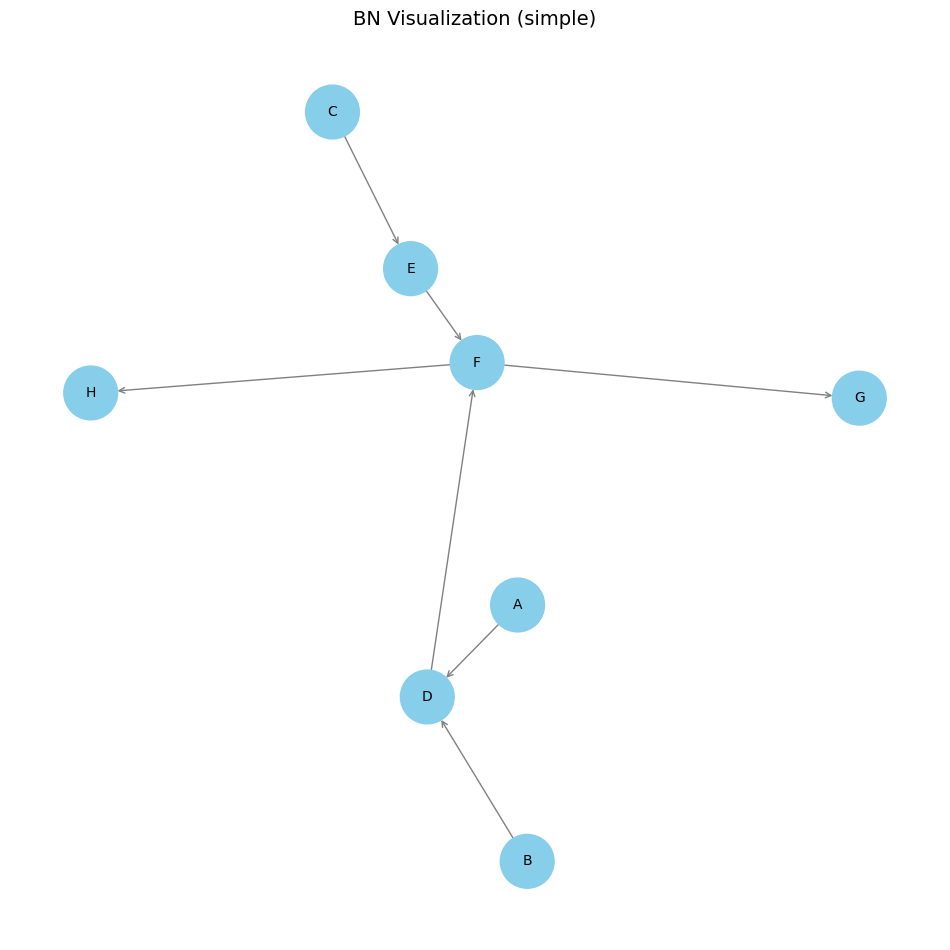

In [7]:
# 1. Default network
plot_bn(bn, layout=nx.spring_layout, type="none")

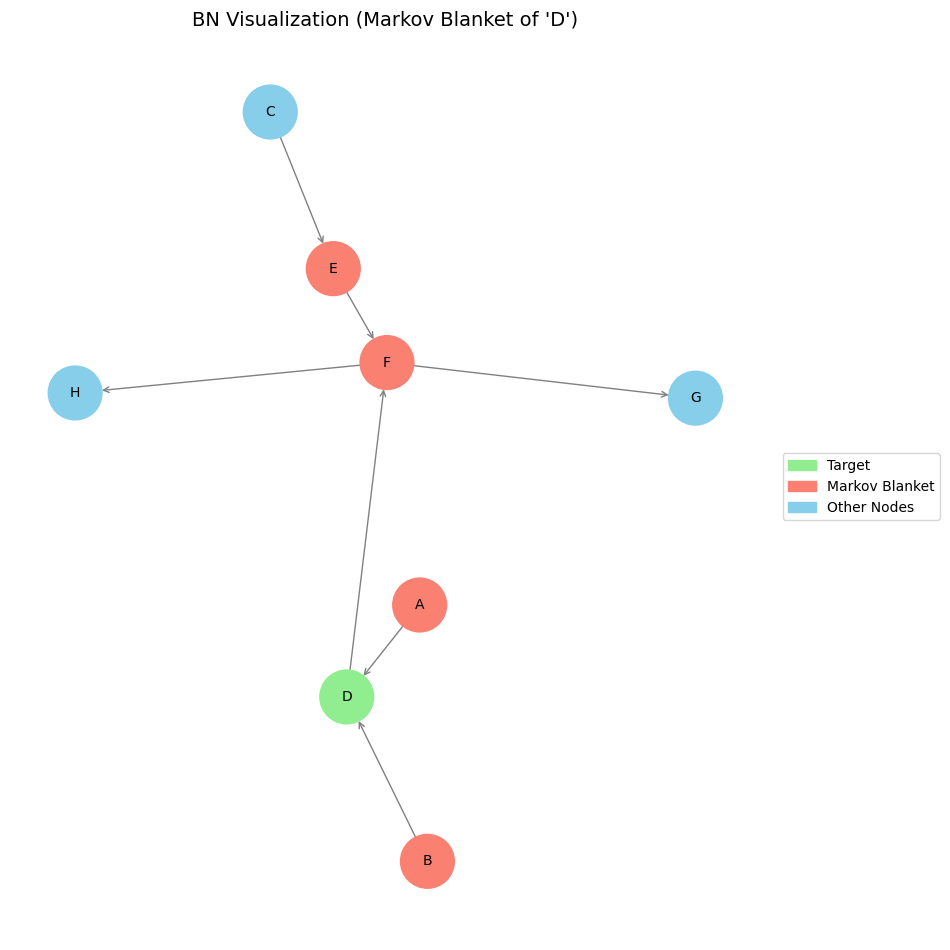

In [8]:
# 2. Markov blanket of D
plot_bn(bn, layout=nx.spring_layout, type="blanket", target="D")

In [10]:
print(bn.nodes())

['A', 'D', 'B', 'C', 'E', 'F', 'G', 'H']


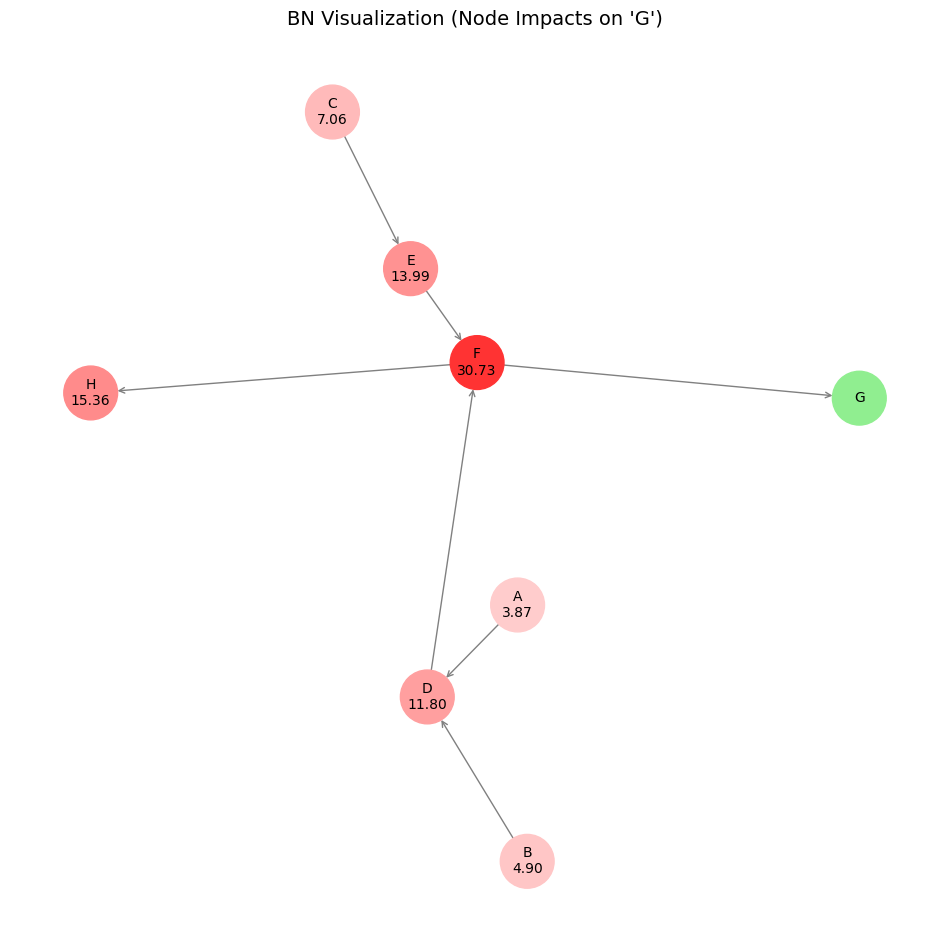

In [23]:
# 3. Node impacts to D
plot_bn(bn, layout=nx.spring_layout, type="impacts", target="G")

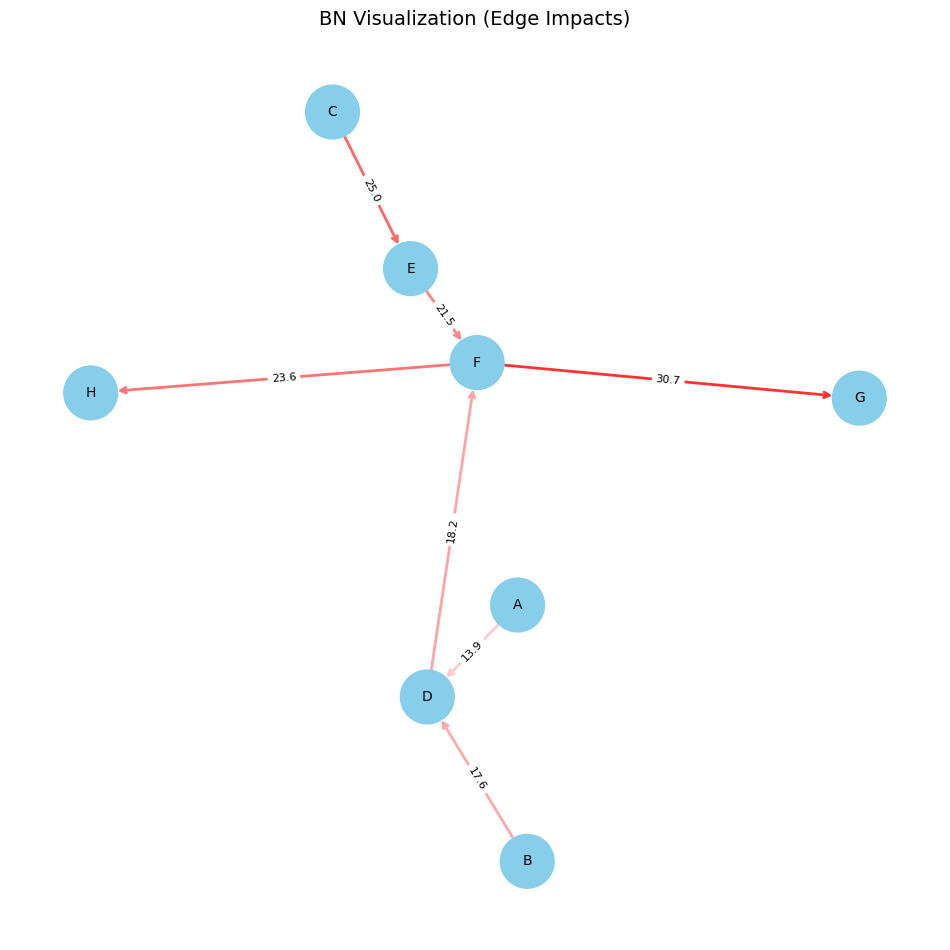

In [25]:
# 4. Edge impacts (must be fully binary)
plot_bn(bn, layout=nx.spring_layout, type="edges")

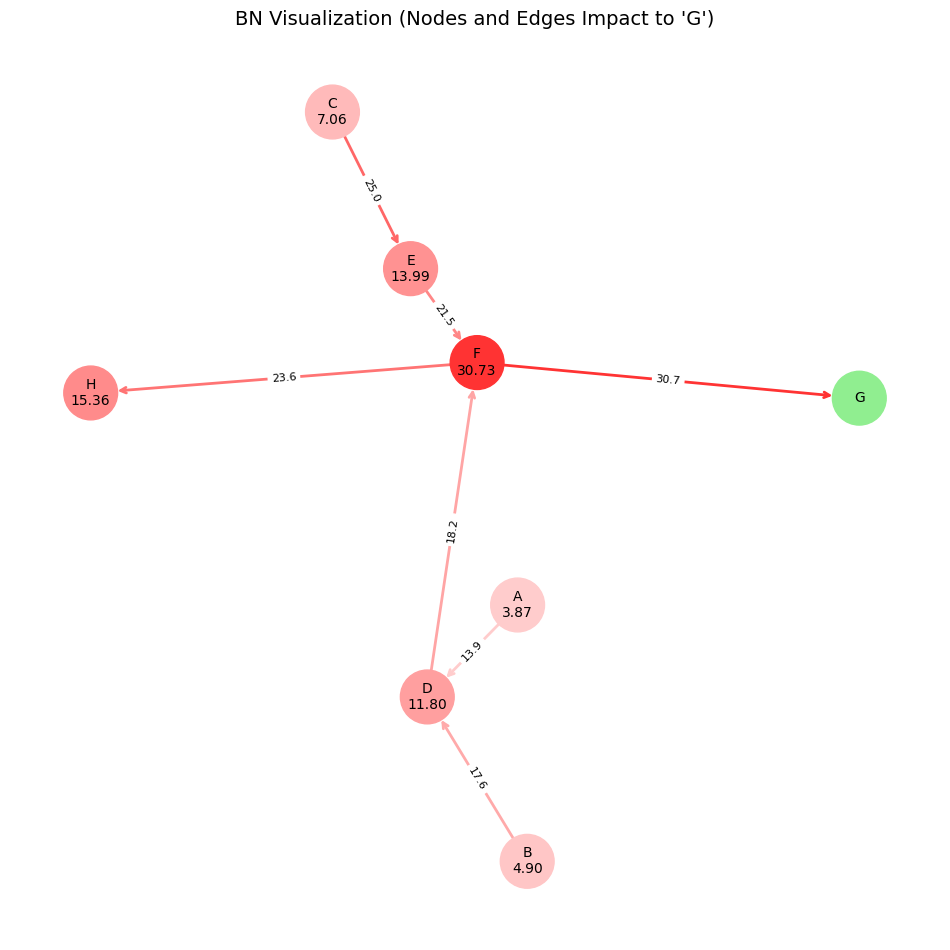

In [27]:

# 5. Node + edge impacts to D
plot_bn(bn, layout=nx.spring_layout, type="edges_and_impacts", target="G")

In [ ]:
from bibas.heatmap_plot import plot_bibas_heatmap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from pgmpy.inference import VariableElimination
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.patches as patches
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import random

In [ ]:
def draw_bn_structure(bn):
    G = nx.DiGraph(bn.edges())
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', arrows=True, font_size=12)
    plt.title("Bayesian Network Structure")
    plt.show()

In [ ]:
# Defining a simple example Bayesian Network
bn = DiscreteBayesianNetwork([('A', 'C'), ('B', 'C'), ('C', 'D')])

cpd_A = TabularCPD(variable='A', variable_card=2, values=[[0.7], [0.3]])
cpd_B = TabularCPD(variable='B', variable_card=2, values=[[0.6], [0.4]])
cpd_C = TabularCPD(variable='C', variable_card=2,
                   values=[[0.9, 0.4, 0.5, 0.1],
                           [0.1, 0.6, 0.5, 0.9]],
                   evidence=['A', 'B'],
                   evidence_card=[2, 2])
cpd_D = TabularCPD(variable='D', variable_card=2,
                   values=[[0.8, 0.3],
                           [0.2, 0.7]],
                   evidence=['C'],
                   evidence_card=[2])

bn.add_cpds(cpd_A, cpd_B, cpd_C, cpd_D)
bn.check_model()

In [ ]:
draw_bn_structure(bn)

In [ ]:
plot_bibas_heatmap(bn)

In [ ]:
# Create a random DAG with 20 nodes
random.seed(33)

nodes = [chr(i) for i in range(65, 75)]  # letters
edges = []
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        if random.random() < 0.25:
            edges.append((nodes[i], nodes[j]))
            
bn = DiscreteBayesianNetwork(edges)

# 2. Add dummy binary CPDs
for node in bn.nodes():
    parents = bn.get_parents(node)
    num_parents = len(parents)
    card = 2
    num_rows = card
    num_cols = 2 ** num_parents if num_parents else 1
    values = np.random.dirichlet(np.ones(num_rows), size=num_cols).T
    cpd = TabularCPD(variable=node, variable_card=card, values=values,
                     evidence=parents if parents else None,
                     evidence_card=[2]*num_parents if num_parents else None)
    bn.add_cpds(cpd)

bn.check_model()

In [ ]:
draw_bn_structure(bn)

In [ ]:
plot_bibas_heatmap(bn)

In [ ]:
# Create a random DAG with 20 nodes
random.seed(33)

nodes = [chr(i) for i in range(65, 85)]  # letters
edges = []
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        if random.random() < 0.25:
            edges.append((nodes[i], nodes[j]))
            
bn = DiscreteBayesianNetwork(edges)

# 2. Add dummy binary CPDs
for node in bn.nodes():
    parents = bn.get_parents(node)
    num_parents = len(parents)
    card = 2
    num_rows = card
    num_cols = 2 ** num_parents if num_parents else 1
    values = np.random.dirichlet(np.ones(num_rows), size=num_cols).T
    cpd = TabularCPD(variable=node, variable_card=card, values=values,
                     evidence=parents if parents else None,
                     evidence_card=[2]*num_parents if num_parents else None)
    bn.add_cpds(cpd)

bn.check_model()

In [ ]:
draw_bn_structure(bn)

In [ ]:
plot_bibas_heatmap(bn)